In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

Generate random data

In [2]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

Plot 1

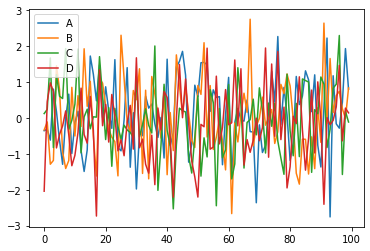

In [3]:
df.plot()
plt.show()

In [6]:
pyo.plot([{ 'x': df.index,
            'y': df[col],
            'name': col
} for col in df.columns])

'temp-plot.html'

Scatter Plot

Generate random data

In [2]:
random_x = np.random.randn(1000)         # normal distribution
random_y = np.random.rand(1000)          # uniform distribution

In [3]:
# define data type 1
data = [go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
)]

In [5]:
# define data type 2
data = [go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
    marker = dict(      # change the marker style
        size = 12,
        color = 'rgb(51,204,153)',
        symbol = 'pentagon',
        line = dict(
            width = 2,
        )
    )
)]

In [6]:
# define the graph details
layout = go.Layout(
    title = 'Random Data Scatterplot',
    xaxis = dict(title = 'Normal distribution'),
    yaxis = dict(title = 'Uniform distribution'), 
    hovermode ='closest' # handles multiple points landing on the same vertical
)

# plot the fig
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='scatter.html')

'solution1.html'

Line Graph

Generate Data

In [7]:
np.random.seed(56)
x_values = np.linspace(0, 1, 100) # 100 evenly spaced values
y_values = np.random.randn(100)   # 100 random values

In [16]:
# create traces
trace0 = go.Scatter(
    x = x_values,
    y = y_values+2,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = x_values,
    y = y_values,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = x_values,
    y = y_values+4,
    mode = 'lines',
    name = 'lines'
)
data = [trace0, trace1, trace2]  # assign traces to data
layout = go.Layout(
    title = 'Line chart showing three different modes'
)
fig = go.Figure(data=data,layout=layout)
pyo.plot(fig, filename='line.html')

'line.html'

Bar Plot


import data

In [3]:

df = pd.read_csv('2018WinterOlympics.csv')

trace1 = go.Bar(
    x=df['NOC'],  # NOC stands for National Olympic Committee
    y=df['Gold'],
    name = 'Gold',
    marker=dict(color='#FFD700') #  gold
)
trace2 = go.Bar(
    x=df['NOC'],
    y=df['Silver'],
    name='Silver',
    marker=dict(color='#9EA0A1') #  silver
)
trace3 = go.Bar(
    x=df['NOC'],
    y=df['Bronze'],
    name='Bronze',
    marker=dict(color='#CD7F32') #  bronze
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title='2018 Winter Olympic Medals by Country',
    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='barplot.html')

'barplot.html'

Bubble Plot

In [8]:
df = pd.read_csv('mpg.csv')

data = [go.Scatter(          # start with a normal scatter plot
    x=df['horsepower'],
    y=df['mpg'],
    text=df['name'],
    mode='markers',
    marker=dict(size=1.5*df['cylinders']) # set the marker size
)]

layout = go.Layout(
    title='Vehicle mpg vs. horsepower',
    xaxis = dict(title = 'horsepower'), # x-axis label
    yaxis = dict(title = 'mpg'),        # y-axis label
    hovermode='closest'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bubble.html')

'bubble.html'

Box Plot

In [20]:
# set up an array input array
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]
y1=[4,18,18,18,18,21,21,22,23,24,24,27,27,29,31,31,32,31,35,58]
y2=[11,20,22,22,27,27,27,28,31,32,35,39,39,40,43,43,50,54,52,67]


data = [
    go.Box(
        y=y,
        boxpoints='all', # display the original data points
        jitter=0.3,      # spread them out so they all appear
        pointpos=-1.8 ,   # offset them to the left of the box
        name='te1'
    ),
    go.Box(
        y=y1,
        boxpoints='outliers', # display only outlying data points
        name='te2'
    ),   
    go.Box(
        y=y2,
        name='te3'
    )
]
layout = go.Layout(
    title = 'Comparison of three-letter-word frequencies<br>\
    between Quintus Curtius Snodgrass and Mark Twain'
)

pyo.plot(data, filename='box.html')

'box.html'

Historgram

In [21]:
df = pd.read_csv('mpg.csv')

In [30]:
data = [go.Histogram(
    x=df['mpg'],
    xbins=dict(start=8,end=50,size=1),
)]

layout = go.Layout(
    title="Miles per Gallon Frequencies of<br>\
    1970's Era Vehicles"
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='histogram.html')

'histogram.html'

Dist Plot

In [2]:
x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4

hist_data = [x1,x2,x3,x4]
group_labels = ['G1','G2','G3','G4']

fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='distplot.html')

'distplot.html'

Heatmap

In [13]:

df1 = pd.read_csv('2010SitkaAK.csv')
df2 = pd.read_csv('2010SantaBarbaraCA.csv')
df3 = pd.read_csv('2010YumaAZ.csv')

trace1 = go.Heatmap(
    x=df1['DAY'],
    y=df1['LST_TIME'],
    z=df1['T_HR_AVG'],
    colorscale='Jet',
    zmin = 0, zmax = 50 # add max/min color values to make each plot consistent
)
trace2 = go.Heatmap(
    x=df2['DAY'],
    y=df2['LST_TIME'],
    z=df2['T_HR_AVG'],
    colorscale='Jet',
    zmin = 0, zmax = 50
)
trace3 = go.Heatmap(
    x=df3['DAY'],
    y=df3['LST_TIME'],
    z=df3['T_HR_AVG'],
    colorscale='Jet',
    zmin = 0, zmax = 50
)

fig = make_subplots(rows=1, cols=3,
    subplot_titles=('Sitka, AK','Santa Barbara, CA', 'Yuma, AZ'),
    shared_yaxes = True,  # this makes the hours appear only on the left
)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(      # access the layout directly!
    title='Temperatures'
)
pyo.plot(fig, filename='Heatmap.html')


'Heatmap.html'